In [36]:
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import theory_functions

In [309]:
data_100 = np.load("../data/rcsb/histogram_100_not_normed.npy", allow_pickle=True)

In [310]:
data_100

array([[178, 176,  84, ...,   0,   0,   0],
       [200, 198,  68, ...,   0,   0,   0],
       [206, 204,  80, ...,   0,   0,   0],
       ...,
       [214, 212, 114, ...,   0,   0,   0],
       [190, 188,  60, ...,   0,   0,   0],
       [170, 168, 124, ...,   0,   0,   0]])

In [311]:
mean_100 = np.mean(data_100, axis=0)

In [312]:
norm_100 = mean_100 / np.sum(mean_100)

In [313]:
np.sum(norm_100)


1.0

In [314]:
lb = np.quantile(data_100, q=1/3, axis=0)

In [315]:
ub = np.quantile(data_100, q=2/3, axis=0)

In [316]:
ub

array([210., 208., 112.,  92.,  24.,  16.,  12.,  12.,  12.,  12.,  12.,
        12.,  10.,  10.,  10.,  10.,   8.,   8.,   8.,   8.,   8.,   6.,
         6.,   6.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   2.,   2.,
         4.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [317]:
norm_lb = lb / np.sum(mean_100)
norm_ub = ub / np.sum(mean_100)

In [318]:
x = np.linspace(1, 300, 300)[:-1]

[]

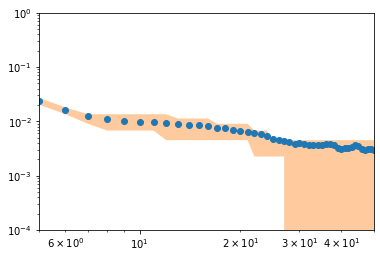

In [319]:
plt.scatter(x, norm_100)
plt.fill_between(x, norm_ub, norm_lb, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

# Theory params

In [320]:
d_range = np.arange(0.001, 0.0016, 0.0001)
e_range = np.arange(2, 4, 1)
chain = 100
harmonic = theory_functions.harmonic_number(chain//2)
weights = norm_ub - norm_lb

In [321]:
# for i in range(len(norm_ub)):
#     print(f"{norm_ub[i]} - {norm_lb[i]} = {norm_ub[i] - norm_lb[i]}")

# Curve fit

In [322]:
parameters, cov = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights[4:50],
                                           xdata=x[4:50], ydata=norm_100[4:50],
        bounds=([chain - 1, harmonic - 0.00001, e_range[0], d_range[0]],
                [chain, harmonic, e_range[-1], d_range[-1]]))

In [323]:
print(f"chain: {parameters[0]}, H_N/2: {parameters[1]}, e: {parameters[2]}, d: {parameters[3]}")

chain: 99.99999999926678, H_N/2: 4.499195338329424, e: 2.0000000000000004, d: 0.0014754397259513908


(0.001, 0.1)

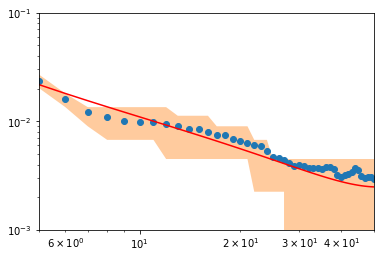

In [324]:
plt.scatter(x[4:50], norm_100[4:50])
plt.fill_between(x, norm_ub, norm_lb, alpha=0.4, zorder=-1)
plt.plot(x[4:50], theory_functions.amino_acid_distance_distribution(x[4:50], *parameters), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

In [325]:
sigma = np.sqrt(np.diag(cov))
sigma 

array([2.18300260e+01, 1.89228934e+00, 7.66936374e-01, 3.11560499e-04])

In [326]:
print(f"chain: {parameters[0]} \pm {sigma[0]}, H_N/2: {parameters[1]} \pm {sigma[1]}, e: {parameters[2]} \pm {sigma[2]}, d: {parameters[3]} \pm {sigma[3]}")

chain: 99.99999999926678 \pm 21.830026004828607, H_N/2: 4.499195338329424 \pm 1.8922893385423054, e: 2.0000000000000004 \pm 0.766936373572488, d: 0.0014754397259513908 \pm 0.00031156049929059645


# Least squares

In [61]:
params = [chain, harmonic, e_range[1], d_range[0]]
lsq_res = scipy.optimize.least_squares(theory_functions.vector_of_residuals, x0=params, args=(x[4:50], norm_100[4:50]))
# print(lsq_res)

# 200


In [372]:
data_200 = np.load("../data/rcsb/histogram_200_not_normed.npy", allow_pickle=True)
mean_200 = np.mean(data_200, axis=0)
norm_200 = mean_200 / np.sum(mean_200)
lb_200 = np.quantile(data_200, q=0.05, axis=0)
ub_200 = np.quantile(data_200, q=0.95, axis=0)
norm_lb_200 = lb_200 / np.sum(mean_200)
norm_ub_200 = ub_200 / np.sum(mean_200)
x_200 = np.linspace(1, 300, 300)[:-1]

[]

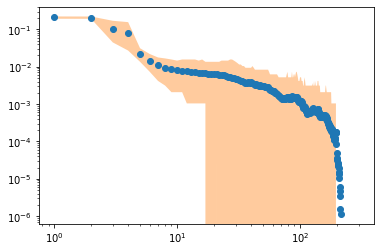

In [373]:
plt.scatter(x_200, norm_200)
plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
# plt.xlim(5, 100)
# plt.ylim(0.0001, 1)
plt.loglog()

## Theory parameters 200

In [374]:
d_range_200 = np.arange(0.0005, 0.0010, 0.0001)
e_range_200 = np.arange(0, 4, 1)
chain_200 = 200
harmonic_200 = theory_functions.harmonic_number(chain_200//2)
weights_200 = norm_ub_200 - norm_lb_200
params_200 = [chain_200, harmonic_200, e_range_200[2], d_range_200[2]]

In [375]:
weights_200[4:100]

array([0.01769342, 0.01457105, 0.01353026, 0.01353026, 0.01353026,
       0.01248947, 0.01353026, 0.01457105, 0.01457105, 0.01457105,
       0.01353026, 0.01457105, 0.01248947, 0.01353026, 0.01353026,
       0.01353026, 0.01248947, 0.01353026, 0.01457105, 0.01457105,
       0.01457105, 0.01457105, 0.01561184, 0.01561184, 0.01457105,
       0.01353026, 0.01248947, 0.01144868, 0.01144868, 0.01040789,
       0.01040789, 0.0093671 , 0.0093671 , 0.0093671 , 0.0093671 ,
       0.0093671 , 0.01040789, 0.0093671 , 0.00832632, 0.00832632,
       0.00832632, 0.00832632, 0.00832632, 0.00832632, 0.00832632,
       0.00832632, 0.00832632, 0.00832632, 0.00832632, 0.00832632,
       0.00832632, 0.00728553, 0.00624474, 0.00624474, 0.00624474,
       0.00624474, 0.00624474, 0.00624474, 0.00624474, 0.00624474,
       0.00624474, 0.00572434, 0.00520395, 0.00520395, 0.00520395,
       0.00520395, 0.00520395, 0.00520395, 0.00520395, 0.00520395,
       0.00520395, 0.00520395, 0.00520395, 0.00624474, 0.00728

[]

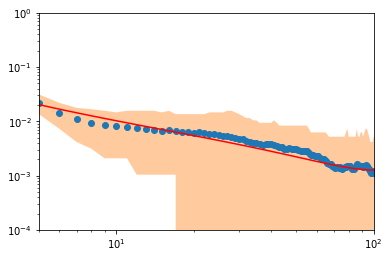

In [376]:
plt.plot(x_200[4:100], theory_functions.amino_acid_distance_distribution(x_200[4:100], *params_200), c="r")
plt.scatter(x_200, norm_200)
plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

## Curve fit

In [377]:
parameters_200, cov_200 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights_200[4:100],
                                           xdata=x_200[4:100], ydata=norm_200[4:100],
        bounds=([chain_200 - 1, harmonic_200 - 0.00001, e_range_200[2], d_range_200[2]],
                [chain_200, harmonic_200, e_range_200[3], d_range_200[3]]))

In [378]:
parameters_200

array([2.00000000e+02, 5.18736752e+00, 2.00000000e+00, 7.03784849e-04])

[]

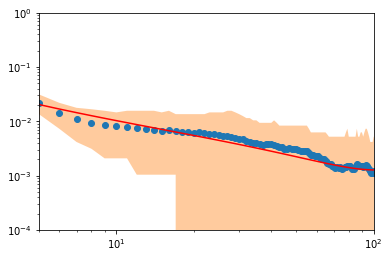

In [379]:
plt.plot(x_200[4:100], theory_functions.amino_acid_distance_distribution(x_200[4:100], *parameters_200), c="r")
plt.scatter(x_200, norm_200)
plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [380]:
cov_200

array([[ 7.29756380e+02,  2.32444538e+00, -6.26418741e-01,
        -2.66014735e-03],
       [ 2.32444538e+00,  1.37134063e+00, -7.44028513e-01,
         4.98677192e-05],
       [-6.26418741e-01, -7.44028513e-01,  4.22857015e-01,
        -2.77456784e-05],
       [-2.66014735e-03,  4.98677192e-05, -2.77456784e-05,
         1.25555911e-08]])

In [381]:
sigma_200 = np.sqrt(np.diag(cov_200))

In [382]:
sigma_200

array([2.70140034e+01, 1.17104254e+00, 6.50274569e-01, 1.12051734e-04])

In [383]:
print(f"chain: {parameters_200[0]} \pm {sigma_200[0]}, H_N/2: {parameters_200[1]} \pm {sigma_200[1]}, e: {parameters_200[2]} \pm {sigma_200[2]}, d: {parameters_200[3]} \pm {sigma_200[3]}")

chain: 199.99999999999997 \pm 27.01400340157165, H_N/2: 5.187367517639622 \pm 1.1710425417355081, e: 2.0000000000000004 \pm 0.6502745687128134, d: 0.0007037848485930185 \pm 0.00011205173384541642


# 300

In [384]:
data_300 = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)
mean_300 = np.mean(data_300, axis=0)
norm_300 = mean_300 / np.sum(mean_300)
lb_300 = np.quantile(data_300, q=0.05, axis=0)
ub_300 = np.quantile(data_300, q=0.95, axis=0)
norm_lb_300 = lb_300 / np.sum(mean_300)
norm_ub_300 = ub_300 / np.sum(mean_300)
x_300 = np.linspace(1, 300, 300)[:-1]

[]

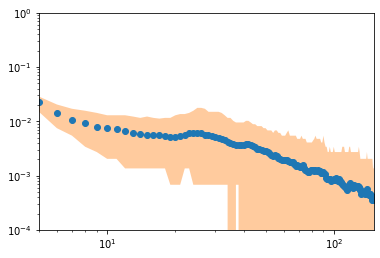

In [385]:
plt.scatter(x_300, norm_300)
plt.fill_between(x_300, norm_ub_300, norm_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

## Theory params 300

In [386]:
d_range_300 = np.arange(0.0002, 0.0010, 0.0001)
e_range_300 = np.arange(0, 8, 1)
chain_300 = 300
harmonic_300 = theory_functions.harmonic_number(chain_300//2)
weights_300 = norm_ub_300 - norm_lb_300
params_300 = [chain_300, harmonic_300, e_range_300[4], d_range_300[5]]

In [301]:
# for i in range(len(norm_ub_300)):
#     if norm_ub_300[i] - norm_lb_300[i] == 0.0:
#         print(i)
#         print(f"{norm_300[i]}; {norm_ub_300[i]} - {norm_lb_300[i]} = {norm_ub_300[i] - norm_lb_300[i]}")

[]

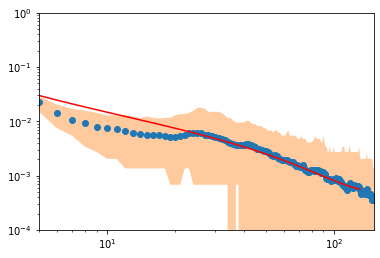

In [387]:
plt.plot(x_300[4:130], theory_functions.amino_acid_distance_distribution(x_300[4:130], *params_300), c="r")
plt.scatter(x_300, norm_300)
plt.fill_between(x_300, norm_ub_300, norm_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

In [388]:
parameters_300, cov_300 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights_300[4:130],
                                           xdata=x_300[4:130], ydata=norm_300[4:130],
        bounds=([chain_300 - 1, harmonic_300 - 0.00001, e_range_300[3], d_range_300[4]],
                [chain_300, harmonic_300, e_range_300[4], d_range_300[5]]))

In [389]:
sigma_300 = np.sqrt(np.diag(cov_300))

In [390]:
print(f"chain: {parameters_300[0]} \pm {sigma_300[0]}, H_N/2: {parameters_300[1]} \pm {sigma_300[1]}, e: {parameters_300[2]} \pm {sigma_300[2]}, d: {parameters_300[3]} \pm {sigma_300[3]}")

chain: 299.00000000000006 \pm 82.39513904862439, H_N/2: 5.59118058864388 \pm 1.4784005468544055, e: 3.4694159394245876 \pm 0.3627953002478915, d: 0.0006000000000000007 \pm 0.00014503329238176022


# 3D Simulations

## 100

In [394]:
sim_100 = np.load("../data/simulations/3d/histogram_100_not_normed.npy", allow_pickle=True)
sim_mean_100 = np.mean(sim_100, axis=0)
norm_sim_100 = sim_mean_100 / np.sum(sim_mean_100)
sim_lb_100 = np.quantile(sim_100, q=0.05, axis=0)
sim_ub_100 = np.quantile(sim_100, q=0.95, axis=0)
norm_sim_lb_100 = sim_lb_100 / np.sum(sim_mean_100)
norm_sim_ub_100 = sim_ub_100 / np.sum(sim_mean_100)
sim_x_100 = np.linspace(1, 300, 300)[:-1]

[]

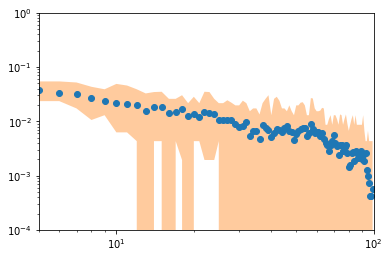

In [396]:
plt.scatter(sim_x_100, norm_sim_100)
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [414]:
sim_d_range_100 = np.arange(0.003, 0.0036, 0.0001)
sim_e_range_100 = np.arange(2, 4, 1)
sim_chain_100 = 100
sim_harmonic_100 = theory_functions.harmonic_number(sim_chain_100//2)
sim_weights_100 = norm_sim_ub_100 - norm_sim_lb_100
sim_params_100 = [sim_chain_100, sim_harmonic_100, sim_e_range_100[0], sim_d_range_100[1]]

[]

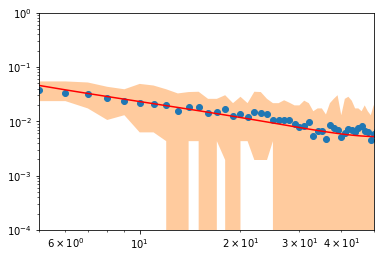

In [415]:
plt.plot(sim_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_x_100[4:50], *sim_params_100), c="r")
plt.scatter(sim_x_100, norm_sim_100)
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

In [416]:
sim_parameters_100, sim_cov_100 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_100[4:50],
                                           xdata=sim_x_100[4:50], ydata=norm_sim_100[4:50],
        bounds=([sim_chain_100 - 1, sim_harmonic_100 - 0.00001, sim_e_range_100[0], sim_d_range_100[0]],
                [sim_chain_100, sim_harmonic_100, sim_e_range_100[1], sim_d_range_100[1]]))

In [417]:
sim_sigma_100 = np.sqrt(np.diag(sim_cov_100))
sim_sigma_100 

array([1.90599849e+01, 1.76614742e+00, 7.15841984e-01, 6.24208796e-04])

In [418]:
print(f"chain: {sim_parameters_100[0]} \pm {sim_sigma_100[0]}, H_N/2: {sim_parameters_100[1]} \pm {sim_sigma_100[1]}, e: {sim_parameters_100[2]} \pm {sim_sigma_100[2]}, d: {sim_parameters_100[3]} \pm {sim_sigma_100[3]}")

chain: 99.99999999976271 \pm 19.059984904936677, H_N/2: 4.499195338329424 \pm 1.7661474194488058, e: 2.0000000000000004 \pm 0.7158419841773663, d: 0.003093752518626128 \pm 0.0006242087962840917


(0.001, 0.1)

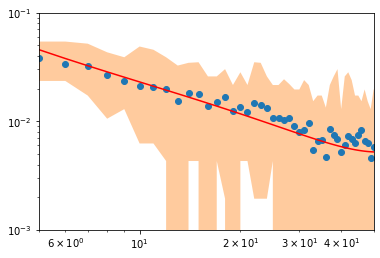

In [419]:
plt.scatter(sim_x_100[4:50], norm_sim_100[4:50])
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.plot(sim_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_x_100[4:50], *sim_parameters_100), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

## 200

In [420]:
sim_200 = np.load("../data/simulations/3d/histogram_200_not_normed.npy", allow_pickle=True)
sim_mean_200 = np.mean(sim_200, axis=0)
norm_sim_200 = sim_mean_200 / np.sum(sim_mean_200)
sim_lb_200 = np.quantile(sim_200, q=0.05, axis=0)
sim_ub_200 = np.quantile(sim_200, q=0.95, axis=0)
norm_sim_lb_200 = sim_lb_200 / np.sum(sim_mean_200)
norm_sim_ub_200 = sim_ub_200 / np.sum(sim_mean_200)
sim_x_200 = np.linspace(1, 300, 300)[:-1]

[]

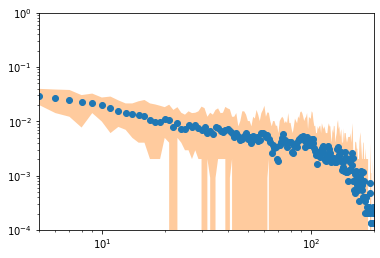

In [421]:
plt.scatter(sim_x_200, norm_sim_200)
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 200)
plt.ylim(0.0001, 1)
plt.loglog()

In [617]:
sim_d_range_200 = np.arange(0.0010, 0.0030, 0.0001)
sim_e_range_200 = np.arange(0, 6, 1)
sim_chain_200 = 200
sim_harmonic_200 = theory_functions.harmonic_number(sim_chain_200//2)
sim_weights_200 = norm_sim_ub_200 - norm_sim_lb_200
sim_params_200 = [sim_chain_200, sim_harmonic_200, sim_e_range_200[0], sim_d_range_200[0]]

[]

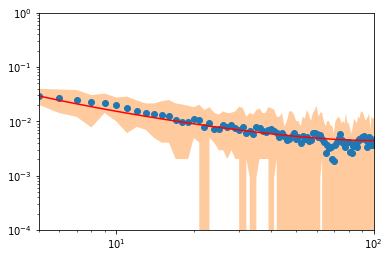

In [618]:
plt.plot(sim_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_x_200[4:100], *sim_params_200), c="r")
plt.scatter(sim_x_200, norm_sim_200)
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [619]:
sim_parameters_200, sim_cov_200 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_200[4:100],
                                           xdata=sim_x_200[4:100], ydata=norm_sim_200[4:100],
        bounds=([sim_chain_200 - 1, sim_harmonic_200 - 0.00001, sim_e_range_200[0], sim_d_range_200[0]],
                [sim_chain_200, sim_harmonic_200, sim_e_range_200[1], sim_d_range_200[1]]))
sim_sigma_200 = np.sqrt(np.diag(sim_cov_200))

In [620]:
print(f"chain: {sim_parameters_200[0]} \pm {sim_sigma_200[0]}, H_N/2: {sim_parameters_200[1]} \pm {sim_sigma_200[1]}, e: {sim_parameters_200[2]} \pm {sim_sigma_200[2]}, d: {sim_parameters_200[3]} \pm {sim_sigma_200[3]}")

chain: 199.99999999992622 \pm 80.67459000914413, H_N/2: 5.187367517639622 \pm 0.9738815833589086, e: 0.6797407896250285 \pm 1.0914963904475918, d: 0.0010999999999940172 \pm 0.0004965421196257304


(0.001, 0.1)

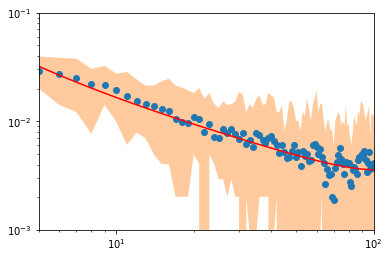

In [483]:
plt.scatter(sim_x_200[4:100], norm_sim_200[4:100])
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.plot(sim_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_x_200[4:100], *sim_parameters_200), c="r")
plt.loglog()
plt.xlim(5, 100)
plt.ylim(0.001, 0.1)

# 300

In [507]:
sim_300 = np.load("../data/simulations/3d/histogram_300_not_normed.npy", allow_pickle=True)
sim_mean_300 = np.mean(sim_300, axis=0)
norm_sim_300 = sim_mean_300 / np.sum(sim_mean_300)
sim_lb_300 = np.quantile(sim_300, q=0.05, axis=0)
sim_ub_300 = np.quantile(sim_300, q=0.95, axis=0)
norm_sim_lb_300 = sim_lb_300 / np.sum(sim_mean_300)
norm_sim_ub_300 = sim_ub_300 / np.sum(sim_mean_300)
sim_x_300 = np.linspace(1, 300, 300)[:-1]

[]

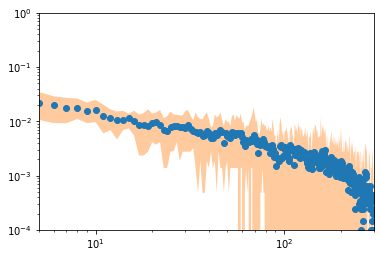

In [508]:
plt.scatter(sim_x_300, norm_sim_300)
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 300)
plt.ylim(0.0001, 1)
plt.loglog()

In [529]:
sim_d_range_300 = np.arange(0.0001, 0.0030, 0.0001)
sim_e_range_300 = np.arange(0, 6, 1)
sim_chain_300 = 300
sim_harmonic_300 = theory_functions.harmonic_number(sim_chain_300//2)
sim_weights_300 = norm_sim_ub_300 - norm_sim_lb_300
sim_params_300 = [sim_chain_300, sim_harmonic_300, sim_e_range_300[1], sim_d_range_300[6]]

[]

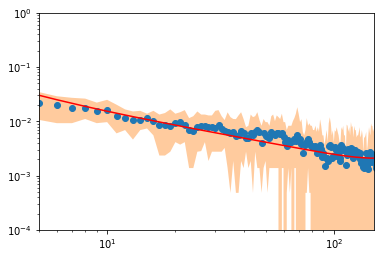

In [530]:
plt.plot(sim_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_x_300[4:150], *sim_params_300), c="r")
plt.scatter(sim_x_300, norm_sim_300)
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

In [531]:
sim_parameters_300, sim_cov_300 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_300[4:150],
                                           xdata=sim_x_300[4:150], ydata=norm_sim_300[4:150],
        bounds=([sim_chain_300 - 1, sim_harmonic_300 - 0.00001, sim_e_range_300[0], sim_d_range_300[5]],
                [sim_chain_300, sim_harmonic_300, sim_e_range_300[1], sim_d_range_300[6]]))
sim_sigma_300 = np.sqrt(np.diag(sim_cov_300))

In [532]:
print(f"chain: {sim_parameters_300[0]} \pm {sim_sigma_300[0]}, H_N/2: {sim_parameters_300[1]} \pm {sim_sigma_300[1]}, e: {sim_parameters_300[2]} \pm {sim_sigma_300[2]}, d: {sim_parameters_300[3]} \pm {sim_sigma_300[3]}")

chain: 299.99999999999864 \pm 89.19361431142097, H_N/2: 5.5911705886439105 \pm 1.0074594247949915, e: 0.9088287564911117 \pm 1.0355774586248272, d: 0.0006991172331883311 \pm 0.0002442299472154607


(0.001, 0.1)

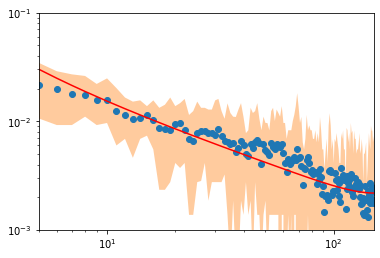

In [533]:
plt.scatter(sim_x_300[4:150], norm_sim_300[4:150])
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.plot(sim_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_x_300[4:150], *sim_parameters_300), c="r")
plt.loglog()
plt.xlim(5, 150)
plt.ylim(0.001, 0.1)

# 2D Simulations

## 100

In [544]:
import pandas as pd
sim_2d_100 = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean_100 = sim_2d_100["mean"].to_numpy()
norm_sim_2d_100 = sim_2d_mean_100 / np.sum(sim_2d_mean_100)
sim_2d_lb_100 = sim_2d_100["lower_bound"].to_numpy()
sim_2d_ub_100 = sim_2d_100["upper_bound"].to_numpy()
norm_sim_2d_lb_100 = sim_2d_lb_100 / np.sum(sim_2d_mean_100)
norm_sim_2d_ub_100 = sim_2d_ub_100 / np.sum(sim_2d_mean_100)
sim_2d_x_100 = sim_2d_100["variable"].to_numpy()

[]

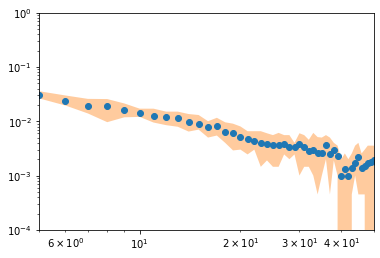

In [546]:
plt.scatter(sim_2d_x_100, norm_sim_2d_100)
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

In [583]:
sim_2d_d_range_100 = np.arange(0.001, 0.0026, 0.0001)
sim_2d_e_range_100 = np.arange(0, 6, 1)
sim_2d_chain_100 = 100
sim_2d_harmonic_100 = theory_functions.harmonic_number(sim_2d_chain_100//2)
sim_2d_weights_100 = norm_sim_2d_ub_100 - norm_sim_2d_lb_100
sim_2d_params_100 = [sim_2d_chain_100, sim_2d_harmonic_100, sim_2d_e_range_100[4], sim_2d_d_range_100[9]]

[]

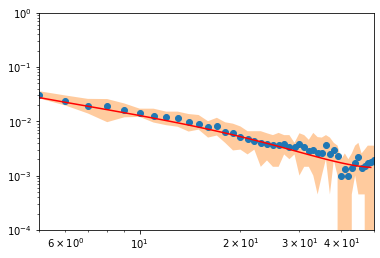

In [584]:
plt.plot(sim_2d_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_2d_x_100[4:50], *sim_2d_params_100), c="r")
plt.scatter(sim_2d_x_100, norm_sim_2d_100)
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

In [585]:
sim_2d_parameters_100, sim_2d_cov_100 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_2d_weights_100[4:50],
                                           xdata=sim_2d_x_100[4:50], ydata=norm_sim_2d_100[4:50],
        bounds=([sim_2d_chain_100 - 1, sim_2d_harmonic_100 - 0.00001, sim_2d_e_range_100[3], sim_2d_d_range_100[8]],
                [sim_2d_chain_100, sim_2d_harmonic_100, sim_2d_e_range_100[4], sim_2d_d_range_100[9]]))

In [586]:
sim_2d_sigma_100 = np.sqrt(np.diag(sim_2d_cov_100))
sim_2d_sigma_100 

array([1.99379114e+01, 1.35330506e+00, 7.24285373e-01, 2.93918320e-04])

In [587]:
print(f"chain: {sim_2d_parameters_100[0]} \pm {sim_2d_sigma_100[0]}, H_N/2: {sim_2d_parameters_100[1]} \pm {sim_2d_sigma_100[1]}, e: {sim_2d_parameters_100[2]} \pm {sim_2d_sigma_100[2]}, d: {sim_2d_parameters_100[3]} \pm {sim_2d_sigma_100[3]}")

chain: 99.99999999999999 \pm 19.937911386884856, H_N/2: 4.499195338329424 \pm 1.3533050552413093, e: 3.6106619733346768 \pm 0.7242853733452995, d: 0.0019000000000000002 \pm 0.0002939183201845826


(0.001, 0.1)

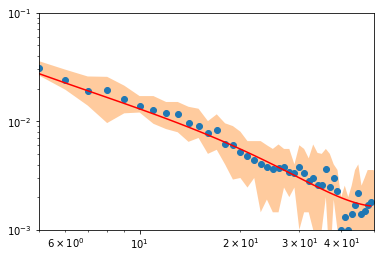

In [588]:
plt.scatter(sim_2d_x_100[4:50], norm_sim_2d_100[4:50])
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.plot(sim_2d_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_2d_x_100[4:50], *sim_2d_parameters_100), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

## 200

[]

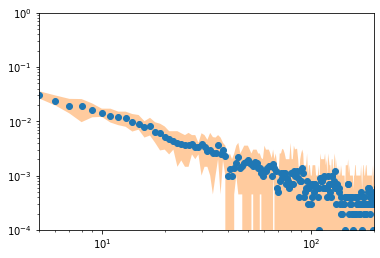

In [593]:
sim_2d_200 = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean_200 = sim_2d_200["mean"].to_numpy()
norm_sim_2d_200 = sim_2d_mean_200 / np.sum(sim_2d_mean_200)
sim_2d_lb_200 = sim_2d_200["lower_bound"].to_numpy()
sim_2d_ub_200 = sim_2d_200["upper_bound"].to_numpy()
norm_sim_2d_lb_200 = sim_2d_lb_200 / np.sum(sim_2d_mean_200)
norm_sim_2d_ub_200 = sim_2d_ub_200 / np.sum(sim_2d_mean_200)
sim_2d_x_200 = sim_2d_200["variable"].to_numpy()
plt.scatter(sim_2d_x_200, norm_sim_2d_200)
plt.fill_between(sim_2d_x_200, norm_sim_2d_ub_200, norm_sim_2d_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 200)
plt.ylim(0.0001, 1)
plt.loglog()

[]

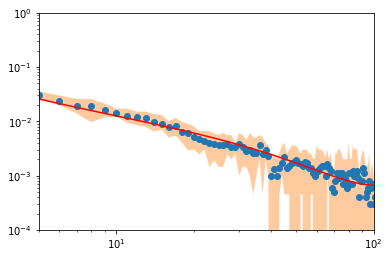

In [600]:
sim_2d_d_range_200 = np.arange(0.0001, 0.002, 0.0001)
sim_2d_e_range_200 = np.arange(0, 6, 1)
sim_2d_chain_200 = 200
sim_2d_harmonic_200 = theory_functions.harmonic_number(sim_2d_chain_200//2)
sim_2d_weights_200 = norm_sim_2d_ub_200 - norm_sim_2d_lb_200
sim_2d_params_200 = [sim_2d_chain_200, sim_2d_harmonic_200, sim_2d_e_range_200[4], sim_2d_d_range_200[8]]
plt.plot(sim_2d_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_2d_x_200[4:100], *sim_2d_params_200), c="r")
plt.scatter(sim_2d_x_200, norm_sim_2d_200)
plt.fill_between(sim_2d_x_200, norm_sim_2d_ub_200, norm_sim_2d_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

In [601]:
sim_2d_parameters_200, sim_2d_cov_200 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_2d_weights_200[4:100],
                                           xdata=sim_2d_x_200[4:100], ydata=norm_sim_2d_200[4:100],
        bounds=([sim_2d_chain_200 - 1, sim_2d_harmonic_200 - 0.00001, sim_2d_e_range_200[3], sim_2d_d_range_200[8]],
                [sim_2d_chain_200, sim_2d_harmonic_200, sim_2d_e_range_200[4], sim_2d_d_range_200[9]]))

In [602]:
sim_2d_sigma_200 = np.sqrt(np.diag(sim_2d_cov_200))
sim_2d_sigma_200 

array([2.80251011e+01, 1.06027446e+00, 4.25612482e-01, 1.05253990e-04])

In [603]:
print(f"chain: {sim_2d_parameters_200[0]} \pm {sim_2d_sigma_200[0]}, H_N/2: {sim_2d_parameters_200[1]} \pm {sim_2d_sigma_200[1]}, e: {sim_2d_parameters_200[2]} \pm {sim_2d_sigma_200[2]}, d: {sim_2d_parameters_200[3]} \pm {sim_2d_sigma_200[3]}")

chain: 199.00000000114736 \pm 28.02510105846437, H_N/2: 5.187377517613841 \pm 1.060274460640084, e: 3.9999999999999223 \pm 0.42561248248852684, d: 0.0009021307229415463 \pm 0.00010525399047636151


(0.0001, 0.1)

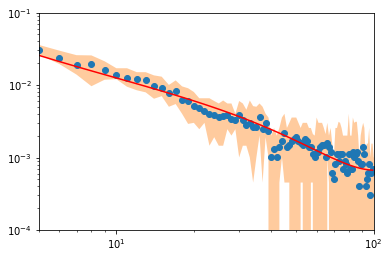

In [606]:
plt.scatter(sim_2d_x_200[4:100], norm_sim_2d_200[4:100])
plt.fill_between(sim_2d_x_200, norm_sim_2d_ub_200, norm_sim_2d_lb_200, alpha=0.4, zorder=-1)
plt.plot(sim_2d_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_2d_x_200[4:100], *sim_2d_parameters_200), c="r")
plt.loglog()
plt.xlim(5, 100)
plt.ylim(0.0001, 0.1)

## 300

[]

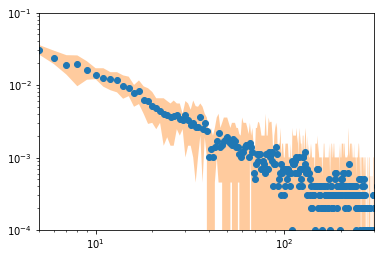

In [608]:
sim_2d_300 = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean_300 = sim_2d_300["mean"].to_numpy()
norm_sim_2d_300 = sim_2d_mean_300 / np.sum(sim_2d_mean_300)
sim_2d_lb_300 = sim_2d_300["lower_bound"].to_numpy()
sim_2d_ub_300 = sim_2d_300["upper_bound"].to_numpy()
norm_sim_2d_lb_300 = sim_2d_lb_300 / np.sum(sim_2d_mean_300)
norm_sim_2d_ub_300 = sim_2d_ub_300 / np.sum(sim_2d_mean_300)
sim_2d_x_300 = sim_2d_300["variable"].to_numpy()
plt.scatter(sim_2d_x_300, norm_sim_2d_300)
plt.fill_between(sim_2d_x_300, norm_sim_2d_ub_300, norm_sim_2d_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 300)
plt.ylim(0.0001, 0.1)
plt.loglog()

[]

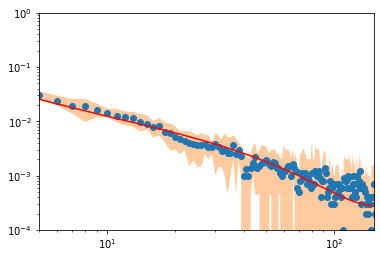

In [612]:
sim_2d_d_range_300 = np.arange(0.0001, 0.002, 0.0001)
sim_2d_e_range_300 = np.arange(0, 6, 1)
sim_2d_chain_300 = 300
sim_2d_harmonic_300 = theory_functions.harmonic_number(sim_2d_chain_300//2)
sim_2d_weights_300 = norm_sim_2d_ub_300 - norm_sim_2d_lb_300
sim_2d_params_300 = [sim_2d_chain_300, sim_2d_harmonic_300, sim_2d_e_range_300[5], sim_2d_d_range_300[5]]
plt.plot(sim_2d_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_2d_x_300[4:150], *sim_2d_params_300), c="r")
plt.scatter(sim_2d_x_300, norm_sim_2d_300)
plt.fill_between(sim_2d_x_300, norm_sim_2d_ub_300, norm_sim_2d_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

In [613]:
sim_2d_parameters_300, sim_2d_cov_300 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_2d_weights_300[4:150],
                                           xdata=sim_2d_x_300[4:150], ydata=norm_sim_2d_300[4:150],
        bounds=([sim_2d_chain_300 - 1, sim_2d_harmonic_300 - 0.00001, sim_2d_e_range_300[4], sim_2d_d_range_300[4]],
                [sim_2d_chain_300, sim_2d_harmonic_300, sim_2d_e_range_300[5], sim_2d_d_range_300[5]]))

In [614]:
sim_2d_sigma_300 = np.sqrt(np.diag(sim_2d_cov_300))
sim_2d_sigma_300 

array([4.21876887e+01, 9.65383247e-01, 6.38257804e-01, 7.08388089e-05])

In [615]:
print(f"chain: {sim_2d_parameters_300[0]} \pm {sim_2d_sigma_300[0]}, H_N/2: {sim_2d_parameters_300[1]} \pm {sim_2d_sigma_300[1]}, e: {sim_2d_parameters_300[2]} \pm {sim_2d_sigma_300[2]}, d: {sim_2d_parameters_300[3]} \pm {sim_2d_sigma_300[3]}")

chain: 299.0001351639436 \pm 42.18768871214686, H_N/2: 5.59118058864388 \pm 0.9653832465863456, e: 4.999999891622855 \pm 0.6382578042646547, d: 0.0005992951151312987 \pm 7.083880889936667e-05


(0.0001, 0.1)

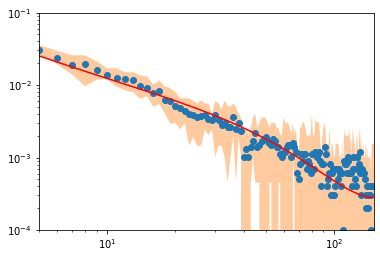

In [616]:
plt.scatter(sim_2d_x_300[4:150], norm_sim_2d_300[4:150])
plt.fill_between(sim_2d_x_300, norm_sim_2d_ub_300, norm_sim_2d_lb_300, alpha=0.4, zorder=-1)
plt.plot(sim_2d_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_2d_x_300[4:150], *sim_2d_parameters_300), c="r")
plt.loglog()
plt.xlim(5, 150)
plt.ylim(0.0001, 0.1)